In [82]:
# Install necessary packages (run only once)
# %pip install prophet statsmodels scikit-learn keras tensorflow matplotlib pandas numpy pmdarima plotly



In [83]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import timedelta

# ML + Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Time Series
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima


              BTCL
DateTime          
2020-04-23  158.45
2020-04-24  158.45
2020-04-27  158.45
2020-04-28  158.45
2020-04-29  158.45
...            ...
2025-04-21  570.00
2025-04-22  570.00
2025-04-23  570.00
2025-04-24  570.00
2025-04-25  570.00

[1230 rows x 1 columns]


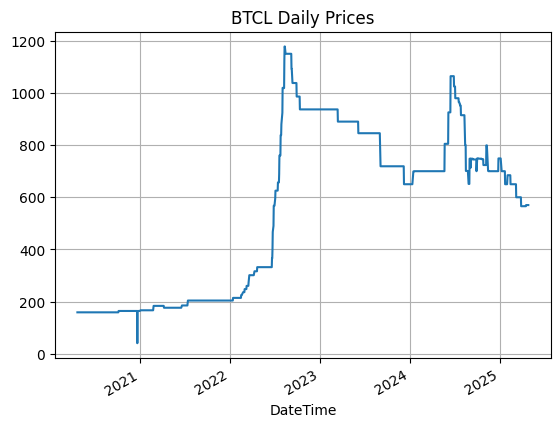

In [84]:
# Data Preprocessing
# Load and clean data
df = pd.read_csv('/Users/ugyen/Documents/GitHub/Stockex-btn/Dataset/BTCL.csv')
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date
daily_df = df.groupby('DateTime').last().reset_index()
daily_df['DateTime'] = pd.to_datetime(daily_df['DateTime'])
daily_df.set_index('DateTime', inplace=True)

print(daily_df)


# Optional: plot
daily_df['BTCL'].plot(title='BTCL Daily Prices')
plt.grid(True)
plt.show()


In [85]:

# Prophet Model
prophet_df = daily_df.reset_index().rename(columns={'DateTime': 'ds', 'BTCL': 'y'})
prophet = Prophet(daily_seasonality=True)
prophet.fit(prophet_df)

future = prophet.make_future_dataframe(periods=30)
prophet_forecast = prophet.predict(future)

# Forecast results
prophet_result = prophet_forecast[['ds', 'yhat']].set_index('ds').rename(columns={'yhat': 'Prophet'})



18:39:24 - cmdstanpy - INFO - Chain [1] start processing
18:39:25 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
# ARIMA Model

# Step 1: Ensure regular frequency and fill missing values
daily_df = daily_df.asfreq('D')
daily_df['BTCL'] = daily_df['BTCL'].ffill()  # Or use interpolate()

# Step 2: Check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1] < 0.05

check_stationarity(daily_df['BTCL'])

# Step 3: Auto ARIMA model selection
arima_model = auto_arima(
    daily_df['BTCL'],
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    trace=True
)

# Step 4: Fit ARIMA with selected order
order = arima_model.order
model = ARIMA(daily_df['BTCL'], order=order)
model_fit = model.fit()

# Step 5: Forecast
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=daily_df.index[-1] + timedelta(days=1), periods=30, freq='D')
arima_result = pd.DataFrame({'ARIMA': forecast}, index=forecast_index)

# Check output
print(arima_result.head())

ADF Statistic: -1.729489697031445
p-value: 0.4159861049024641
Performing stepwise search to minimize aic


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:1

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14118.845, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14146.120, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14147.940, Time=0.12 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14147.942, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14144.811, Time=0.04 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14122.142, Time=0.87 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14122.478, Time=0.98 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14110.749, Time=2.08 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14119.745, Time=1.41 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=14112.551, Time=1.44 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14111.141, Time=2.24 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14110.496, Time=1.34 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14138.327, Time=2.39 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=14112.337, Time=2.47 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=14121.106, Time=1.84 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=14114.476, Time=3.39 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=14108.681, Time=1.42 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=14144.305, Time=0.52 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14117.028, Time=0.99 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=14109.338, Time=1.65 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=14110.523, Time=1.18 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=14120.326, Time=0.48 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=14119.293, Time=0.72 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=14108.933, Time=0.73 sec


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=14112.658, Time=0.94 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 30.983 seconds


/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ugyen/anaconda3/envs/r-tensorflow/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                 ARIMA
2025-04-26  569.922938
2025-04-27  569.844631
2025-04-28  569.780545
2025-04-29  569.709543
2025-04-30  569.649219


In [87]:
# LSTM Model
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_df[['BTCL']].values)

# Create sequences
def create_dataset(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_dataset(scaled_data, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/Test split
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build LSTM
lstm = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(1)
])
lstm.compile(optimizer=Adam(), loss='mean_squared_error')
lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=5)])

# Predict future
last_sequence = scaled_data[-window_size:]
future_inputs = last_sequence.reshape(1, window_size, 1)
lstm_predictions = []

for _ in range(30):
    pred = lstm.predict(future_inputs)[0, 0]
    lstm_predictions.append(pred)
    future_inputs = np.append(future_inputs[:, 1:, :], [[[pred]]], axis=1)

lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1))
lstm_result = pd.DataFrame({'LSTM': lstm_predictions.flatten()}, index=arima_index)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0420 - val_loss: 0.0016
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 7.5590e-04 - val_loss: 0.0015
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 6.6514e-04 - val_loss: 0.0014
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 4.2630e-04 - val_loss: 0.0013
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 6.5441e-04 - val_loss: 0.0012
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 4.3317e-04 - val_loss: 0.0012
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 2.9070e-04 - val_loss: 0.0011
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - loss: 3.3365e-04 - val_loss: 0.0014
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - loss: 4.1538e-04 - val_loss: 9.8603e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - loss: 3.2672e-04 - val_loss: 0.0014
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 4.5273e-04 - val_loss: 9.3264e-04
E

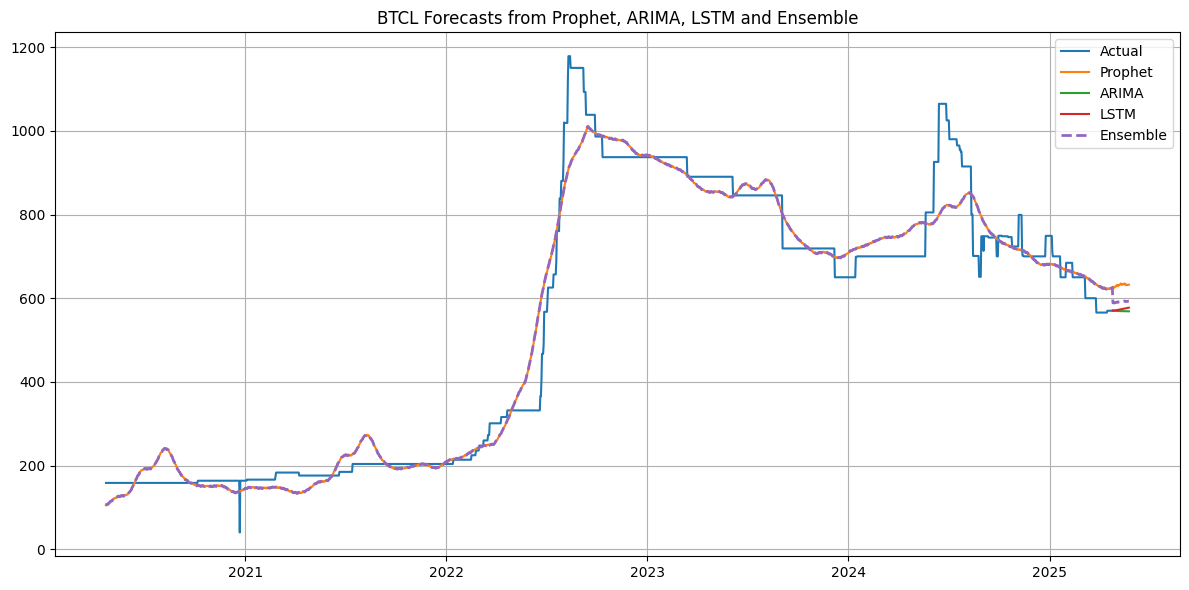

In [88]:
# Ensemble Output
ensemble = pd.concat([prophet_result, arima_result, lstm_result], axis=1)
ensemble['Ensemble'] = ensemble.mean(axis=1)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_df['BTCL'], label='Actual')
plt.plot(ensemble.index, ensemble['Prophet'], label='Prophet')
plt.plot(ensemble.index, ensemble['ARIMA'], label='ARIMA')
plt.plot(ensemble.index, ensemble['LSTM'], label='LSTM')
plt.plot(ensemble.index, ensemble['Ensemble'], label='Ensemble', linewidth=2, linestyle='--')
plt.legend()
plt.title('BTCL Forecasts from Prophet, ARIMA, LSTM and Ensemble')
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
#Performance Metrics

def evaluate(y_true, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }



In [90]:
# Show the last 10 predicted values from each model
print("\n📈 Prophet Forecast:")
print(prophet_result.tail(10))

print("\n🔮 ARIMA Forecast:")
print(arima_result.tail(10))

print("\n🧠 LSTM Forecast:")
print(lstm_result.tail(10))

print("\n📊 Ensemble Forecast:")
print(ensemble[['Ensemble']].tail(10))


📈 Prophet Forecast:
               Prophet
ds                    
2025-05-16  634.338096
2025-05-17  635.115543
2025-05-18  634.866694
2025-05-19  631.119618
2025-05-20  632.459289
2025-05-21  631.798657
2025-05-22  631.128274
2025-05-23  632.046732
2025-05-24  632.614717
2025-05-25  632.258982

🔮 ARIMA Forecast:
                 ARIMA
2025-05-16  568.904090
2025-05-17  568.871265
2025-05-18  568.840071
2025-05-19  568.809790
2025-05-20  568.780938
2025-05-21  568.752996
2025-05-22  568.726319
2025-05-23  568.700528
2025-05-24  568.675866
2025-05-25  568.652057

🧠 LSTM Forecast:
                  LSTM
2025-05-16  574.912354
2025-05-17  575.185303
2025-05-18  575.458435
2025-05-19  575.731567
2025-05-20  576.004639
2025-05-21  576.277893
2025-05-22  576.551147
2025-05-23  576.824341
2025-05-24  577.097778
2025-05-25  577.371338

📊 Ensemble Forecast:
              Ensemble
2025-05-16  592.718180
2025-05-17  593.057370
2025-05-18  593.055067
2025-05-19  591.886992
2025-05-20  592.414955


In [96]:
try:
    actual_df = pd.read_csv('/Users/ugyen/Documents/GitHub/Stockex-btn/BTCL_future_actual_cleaned.csv')
    actual_df['Date'] = pd.to_datetime(actual_df['Date'])
    actual_df.set_index('Date', inplace=True)

    common_index = ensemble.index.intersection(actual_df.index)
    aligned_actual = actual_df.loc[common_index]
    aligned_forecast = ensemble.loc[common_index]

    y_true = aligned_actual['Close Price'].values  # <-- use 'Close Price' here

    metrics = {
        'Prophet': evaluate(y_true, aligned_forecast['Prophet'].values),
        'ARIMA': evaluate(y_true, aligned_forecast['ARIMA'].values),
        'LSTM': evaluate(y_true, aligned_forecast['LSTM'].values),
        'Ensemble': evaluate(y_true, aligned_forecast['Ensemble'].values)
    }

    metrics_df = pd.DataFrame(metrics).T
    print("\n✅ Model Performance on Future Data:\n", metrics_df)

    metrics_df.to_csv('/Users/ugyen/Documents/GitHub/Stockex-btn/btcl_model_metrics.csv')

    comparison_df = pd.DataFrame({
        'Actual Price': aligned_actual['Close Price'],  # <-- here too
        'Prophet': aligned_forecast['Prophet'],
        'ARIMA': aligned_forecast['ARIMA'],
        'LSTM': aligned_forecast['LSTM'],
        'Ensemble': aligned_forecast['Ensemble']
    })

    print("\n📊 Actual vs Forecasted Prices (First 10 Rows):")
    print(comparison_df.head(10))

    comparison_df.to_csv('/Users/ugyen/Documents/GitHub/Stockex-btn/btcl_actual_vs_predictions.csv')

except FileNotFoundError:
    print("\n❌ BTCL_future_actual_cleaned.csv not found. Cannot evaluate or compare.")
except Exception as e:
    print(f"\n⚠️ Unexpected error: {e}")




✅ Model Performance on Future Data:
                RMSE        MAE        R2
Prophet   50.585818  46.698628 -1.178058
ARIMA     41.711272  24.253246 -0.480876
LSTM      39.573048  22.476769 -0.332941
Ensemble  34.107188  29.700529  0.009844

📊 Actual vs Forecasted Prices (First 10 Rows):
            Actual Price     Prophet       ARIMA        LSTM    Ensemble
2025-04-28         570.0  624.577027  569.780545  570.652771  588.336781
2025-04-29         570.0  626.853597  569.709543  570.773010  589.112050
2025-04-30         570.0  627.188862  569.649219  570.926514  589.254865
2025-05-01         570.0  627.550401  569.584575  571.104980  589.413319
2025-05-05         570.0  628.897097  569.362162  571.984253  590.081171
2025-05-06         650.0  631.166795  569.313010  572.231934  590.903913
2025-05-08         647.5  631.653328  569.217710  572.747375  591.206138
2025-05-09         647.5  633.409391  569.172119  573.012146  591.864552
2025-05-12         647.5  631.802648  569.048451  57

In [98]:
# 🔁 Load actual future prices
actual_df = pd.read_csv('/Users/ugyen/Documents/GitHub/Stockex-btn/BTCL_future_actual_cleaned.csv')
actual_df['Date'] = pd.to_datetime(actual_df['Date'])
actual_df.set_index('Date', inplace=True)

# 🧠 Align with forecast index
common_index = ensemble.index.intersection(actual_df.index)
actual_future = actual_df.loc[common_index]['Close Price']

# 📈 Plot with actuals
fig = go.Figure()

# Historical actuals
fig.add_trace(go.Scatter(
    x=daily_df.index, y=daily_df['BTCL'],
    name='Actual BTCL (Historical)', line=dict(color='black')
))

# Actual future prices
fig.add_trace(go.Scatter(
    x=actual_future.index, y=actual_future,
    name='Actual BTCL (Future)', line=dict(color='green', dash='dot', width=3)
))

# Forecasts
fig.add_trace(go.Scatter(x=prophet_result.index, y=prophet_result['Prophet'], name='Prophet'))
fig.add_trace(go.Scatter(x=arima_result.index, y=arima_result['ARIMA'], name='ARIMA'))
fig.add_trace(go.Scatter(x=lstm_result.index, y=lstm_result['LSTM'], name='LSTM'))
fig.add_trace(go.Scatter(x=ensemble.index, y=ensemble['Ensemble'], name='Ensemble', line=dict(dash='dash', width=3)))

# Layout
fig.update_layout(
    title='📊 BTCL Forecast Comparison vs Actual',
    xaxis_title='Date',
    yaxis_title='BTCL Price',
    template='plotly_white'
)

fig.show()